<a href="https://colab.research.google.com/github/CanelitACane/Challenge_Alura_Stone_Data_Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
# Librerías principales
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


Analisis y orden de la información:

In [2]:
# Lista de URLs y nombres
urls = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv", "Tienda 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv", "Tienda 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv", "Tienda 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv", "Tienda 4"),
]

# Lista vacía para guardar los DataFrames
tiendas = []

# Recorrer la lista y cargar cada archivo
for url, nombre in urls:
    df = pd.read_csv(url)
    df['Tienda'] = nombre  # Agregar columna de tienda
    tiendas.append(df)     # Guardar en la lista

# Combinar todos los DataFrames en uno solo
datos = pd.concat(tiendas, ignore_index=True)

# Mostrar las primeras filas
print(datos.head())


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  
1  T

#1. Análisis de facturación



In [3]:
# Calcular el ingreso total por tienda
ingresos_por_tienda = datos.groupby('Tienda')['Precio'].sum()

# Mostrar facturación total de cada tienda
print("Facturación total de cada tienda:\n")
print(f"{'Tienda':<10} | {'Facturación Total (COP)':>22}")
print("-" * 40)
for tienda, ingreso in ingresos_por_tienda.items():
    print(f"{tienda}: ${ingreso:,.0f} ")


Facturación total de cada tienda:

Tienda     | Facturación Total (COP)
----------------------------------------
Tienda 1: $1,150,880,400 
Tienda 2: $1,116,343,500 
Tienda 3: $1,098,019,600 
Tienda 4: $1,038,375,700 


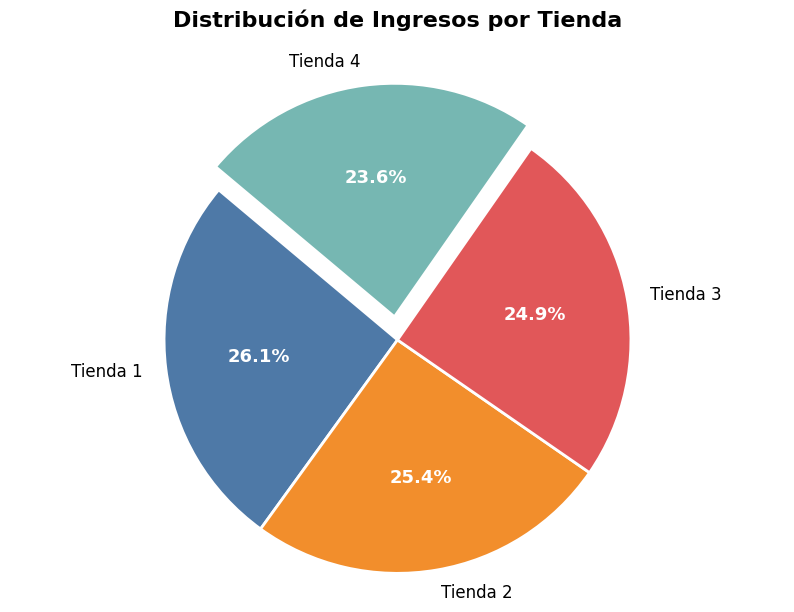

In [4]:
# Definir colores
colores = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2']

# 'Explode': qué tan separada estará cada porción
# Solo explotar la tienda que menos ingresos representa
explode = (0, 0, 0, 0.1)  # Tienda 4 sobresale (0.1 = separación)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Crear el gráfico de pastel
wedges, texts, autotexts = ax.pie(
    ingresos_por_tienda,
    labels=ingresos_por_tienda.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colores,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 12, 'color': 'black'}
)

# Título
ax.set_title('Distribución de Ingresos por Tienda\n', fontsize=16, fontweight='bold')

# Hacerlo círculo perfecto
ax.axis('equal')

# Mejorar porcentajes visualmente
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

# Mostrar gráfico
plt.show()

# 2. Ventas por categoría

In [5]:
# Agrupar por Tienda y Categoría, luego contar
productos_por_tienda_categoria = datos.groupby(['Tienda', 'Categoría del Producto']).size().unstack().fillna(0)

# Mostrar resultados
print(productos_por_tienda_categoria)


Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categoría del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
Tienda                                                                     
Tienda 1                                   182       3

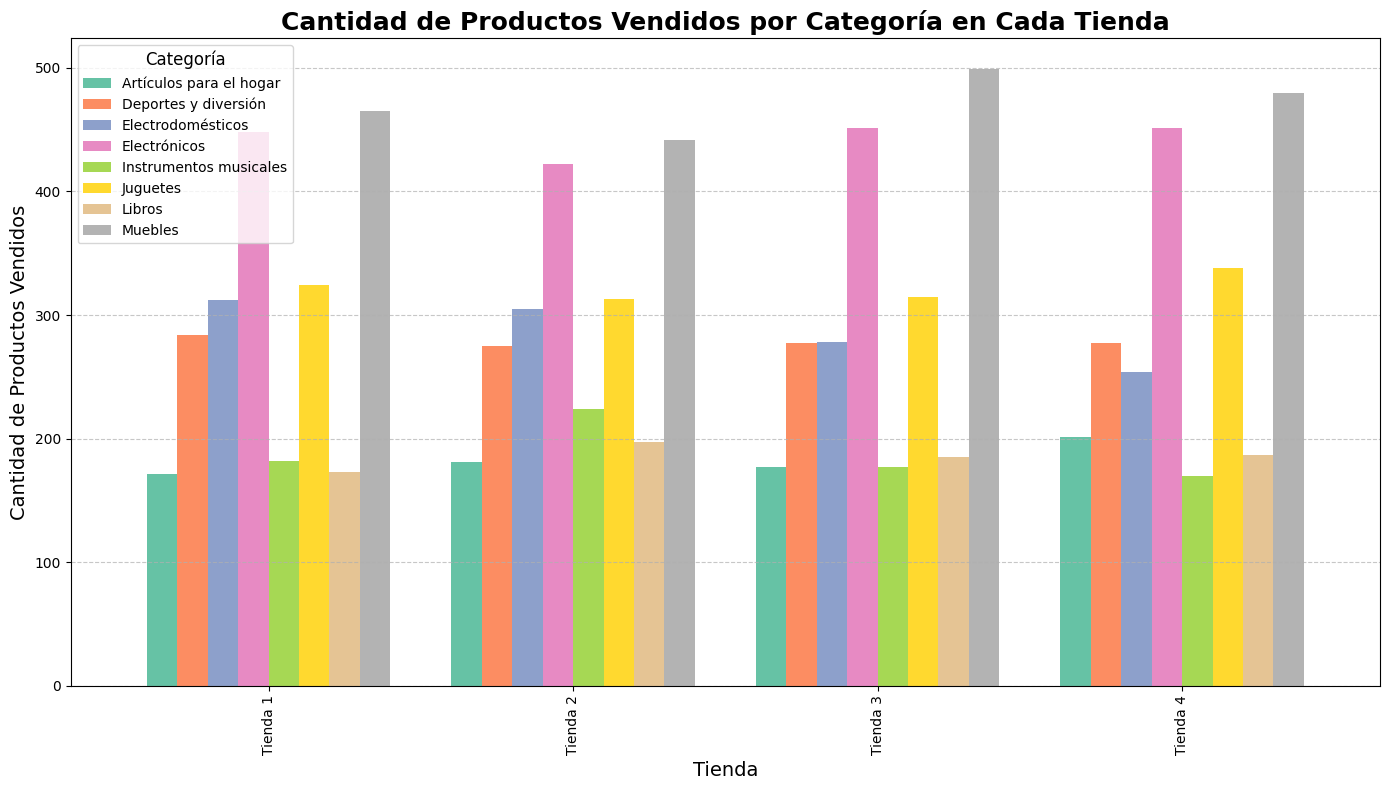

In [6]:
# Agrupamos y reordenamos los datos
productos_por_tienda_categoria = datos.groupby(['Tienda', 'Categoría del Producto']).size().unstack().fillna(0)

# Crear la figura
fig, ax = plt.subplots(figsize=(14, 8))  # Hacemos el gráfico más grande

# Graficar
productos_por_tienda_categoria.plot(kind='bar', ax=ax, width=0.8, colormap='Set2')

# Personalización
ax.set_title('Cantidad de Productos Vendidos por Categoría en Cada Tienda', fontsize=18, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=14)
ax.set_ylabel('Cantidad de Productos Vendidos', fontsize=14)
ax.legend(title='Categoría', fontsize=10, title_fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar para que no se corte nada
plt.tight_layout()

# Mostrar
plt.show()


In [7]:
# Agrupamos y reordenamos los datos
productos_por_tienda_categoria = datos.groupby(['Tienda', 'Categoría del Producto']).size().unstack().fillna(0)

# Convertimos a porcentajes por tienda
productos_por_tienda_categoria_pct = productos_por_tienda_categoria.div(productos_por_tienda_categoria.sum(axis=1), axis=0) * 100


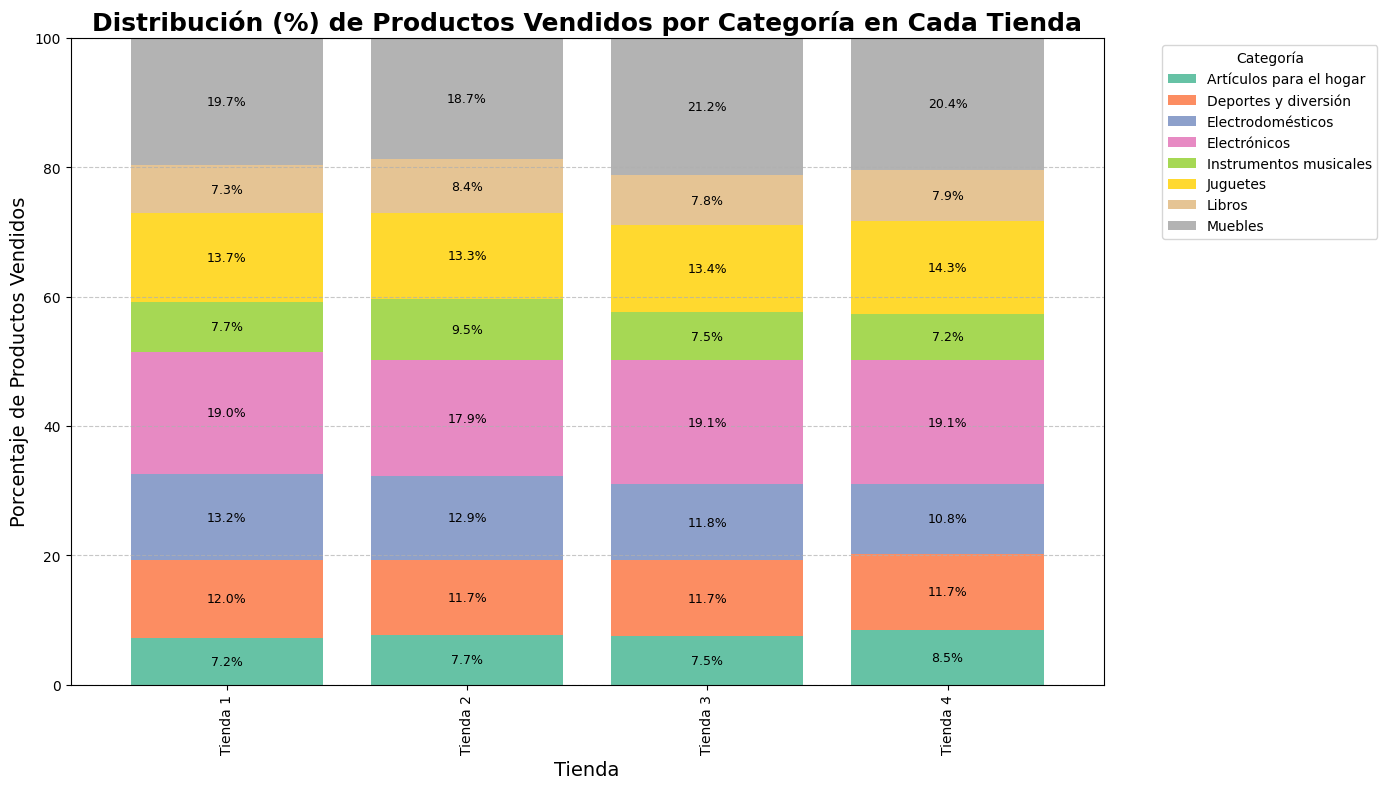

In [8]:
# Crear la figura
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar el DataFrame con porcentajes
productos_por_tienda_categoria_pct.plot(kind='bar', stacked=True, ax=ax, width=0.8, colormap='Set2')

# Personalización del gráfico
ax.set_title('Distribución (%) de Productos Vendidos por Categoría en Cada Tienda', fontsize=18, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=14)
ax.set_ylabel('Porcentaje de Productos Vendidos', fontsize=14)
ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar porcentaje en cada segmento (opcional)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 5:  # solo mostramos si el segmento es suficientemente grande
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

# Ajuste final
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [11]:
# Número de reseñas por tienda
cantidad_resenas = datos.groupby('Tienda')['Calificación'].count()

# Unir ambas métricas
resumen_resenas = pd.DataFrame({
    'Calificación Promedio': calificaciones_promedio,
    'Cantidad de Reseñas': cantidad_resenas
})

print(resumen_resenas)


          Calificación Promedio  Cantidad de Reseñas
Tienda                                              
Tienda 1                   3.98                 2359
Tienda 2                   4.04                 2359
Tienda 3                   4.05                 2359
Tienda 4                   4.00                 2358


<ipython-input-13-1bd17324b471>:37: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


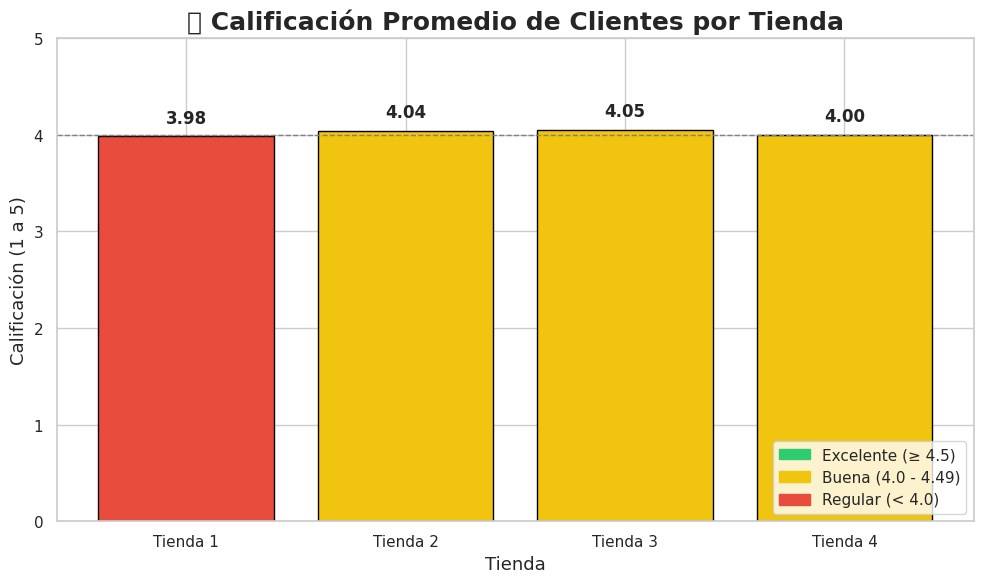

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual más pro
sns.set(style="whitegrid")

# Creamos una paleta de colores basada en el nivel de satisfacción
colores = calificaciones_promedio.apply(lambda x: '#2ecc71' if x >= 4.5 else '#f1c40f' if x >= 4.0 else '#e74c3c')

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras
bars = ax.bar(calificaciones_promedio.index, calificaciones_promedio.values, color=colores, edgecolor='black')

# Título y ejes
ax.set_title('⭐ Calificación Promedio de Clientes por Tienda', fontsize=18, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=13)
ax.set_ylabel('Calificación (1 a 5)', fontsize=13)
ax.set_ylim(0, 5)
ax.axhline(4, color='gray', linestyle='--', linewidth=1, label='Nivel mínimo deseado')

# Etiquetas en cada barra
for bar in bars:
    altura = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, altura + 0.1, f'{altura:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Añadir leyenda personalizada
from matplotlib.patches import Patch
leyenda = [
    Patch(color='#2ecc71', label='Excelente (≥ 4.5)'),
    Patch(color='#f1c40f', label='Buena (4.0 - 4.49)'),
    Patch(color='#e74c3c', label='Regular (< 4.0)')
]
ax.legend(handles=leyenda, loc='lower right')

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [14]:
# Función para mostrar los top productos por tienda
def mostrar_top_productos_por_tienda(df_tienda, nombre_tienda, top=5):
    print(f"\n🔎 {nombre_tienda}")

    productos_ventas = df_tienda['Producto'].value_counts()

    print("\n🏆 Top Productos Más Vendidos:")
    print(productos_ventas.head(top))

    print("\n📉 Productos Menos Vendidos:")
    print(productos_ventas.tail(top))

# Ejecutar por cada tienda
mostrar_top_productos_por_tienda(tienda1, "Tienda 1")
mostrar_top_productos_por_tienda(tienda2, "Tienda 2")
mostrar_top_productos_por_tienda(tienda3, "Tienda 3")
mostrar_top_productos_por_tienda(tienda4, "Tienda 4")



🔎 Tienda 1

🏆 Top Productos Más Vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

📉 Productos Menos Vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

🔎 Tienda 2

🏆 Top Productos Más Vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

📉 Productos Menos Vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

🔎 Tienda 3

🏆 Top Productos Más Vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55

<ipython-input-28-313ee52851db>:13: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


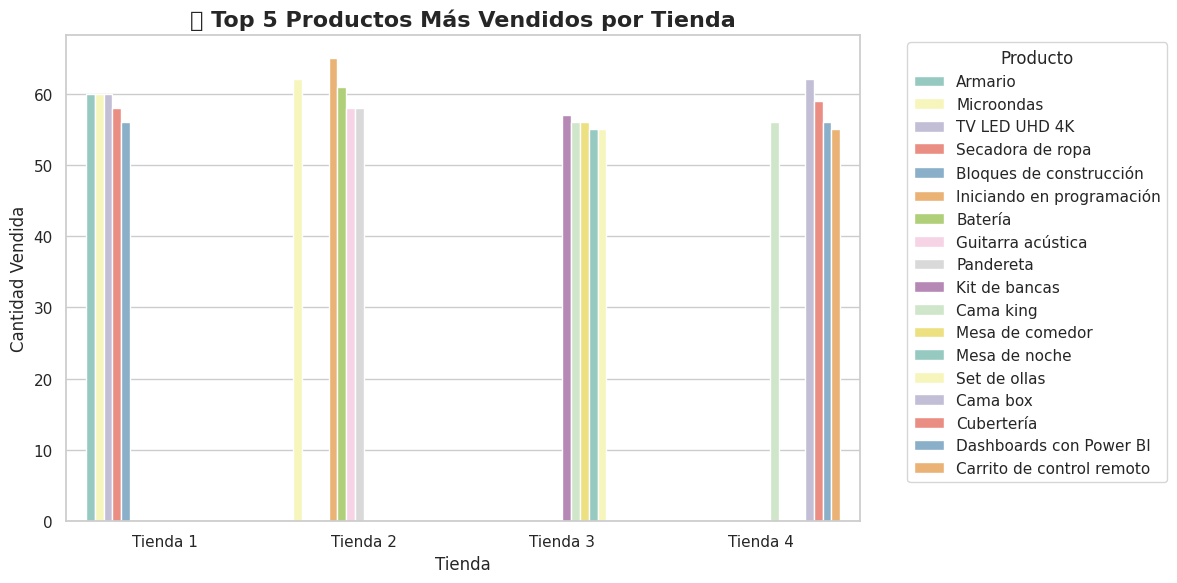

In [28]:

# Obtenemos los top 5 productos más vendidos por tienda
top_productos_por_tienda = datos_productos.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
top5_por_tienda = top_productos_por_tienda.sort_values(['Tienda', 'Cantidad'], ascending=[True, False]).groupby('Tienda').head(5)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_por_tienda, x='Tienda', y='Cantidad', hue='Producto', palette='Set3')

plt.title('🏆 Top 5 Productos Más Vendidos por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
# Obtenemos los productos menos vendidos (bottom 5) por tienda
bottom_productos_por_tienda = datos_productos.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
bottom5_por_tienda = bottom_productos_por_tienda.sort_values(['Tienda', 'Cantidad'], ascending=[True, True]).groupby('Tienda').head(5)



<ipython-input-31-99b4b3a96fc6>:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


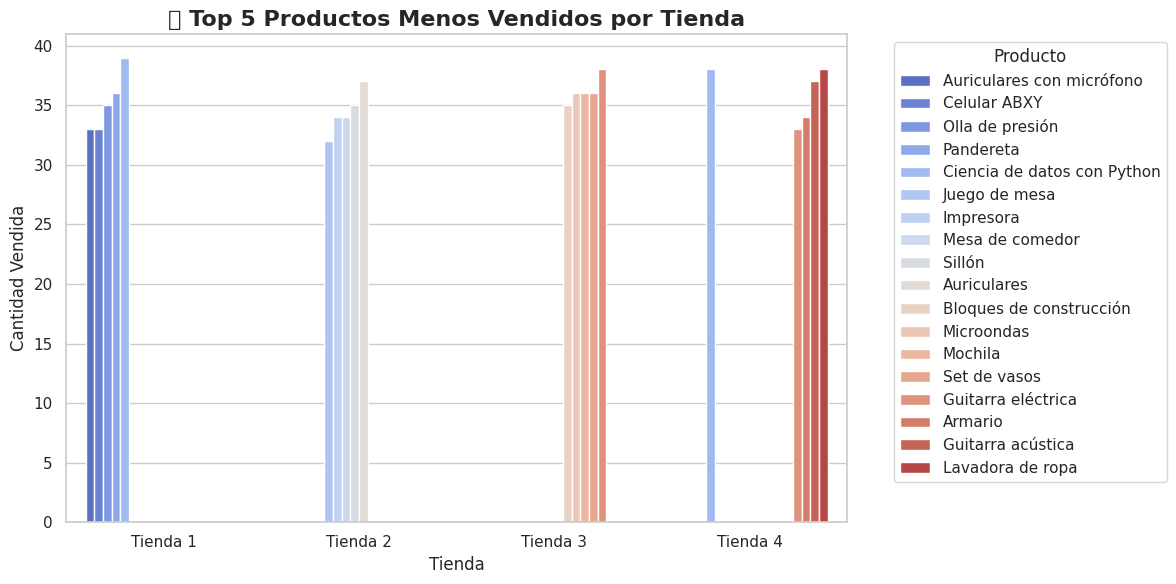

In [31]:
# Visualización de los productos menos vendidos
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom5_por_tienda, x='Tienda', y='Cantidad', hue='Producto', palette='coolwarm')

plt.title('📉 Top 5 Productos Menos Vendidos por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda

In [32]:
# Calculamos el costo de envío promedio por tienda
costo_envio_promedio = datos_productos.groupby('Tienda')['Costo de envío'].mean().round(2)

# Mostramos los resultados
print("🚚 Costo de Envío Promedio por Tienda:")
print(costo_envio_promedio)


🚚 Costo de Envío Promedio por Tienda:
Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


<ipython-input-33-dc1434d30e25>:12: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


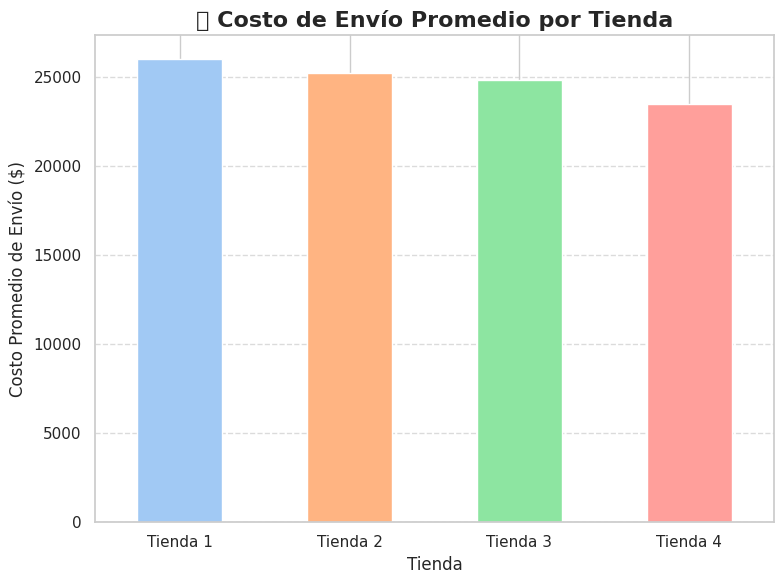

In [33]:
# Visualización
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel")

costo_envio_promedio.plot(kind='bar', color=colors)

plt.title('🚚 Costo de Envío Promedio por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Costo Promedio de Envío ($)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-34-69880b5486e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_productos, x='Tienda', y='Costo de envío', palette='pastel')
<ipython-input-34-69880b5486e9>:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


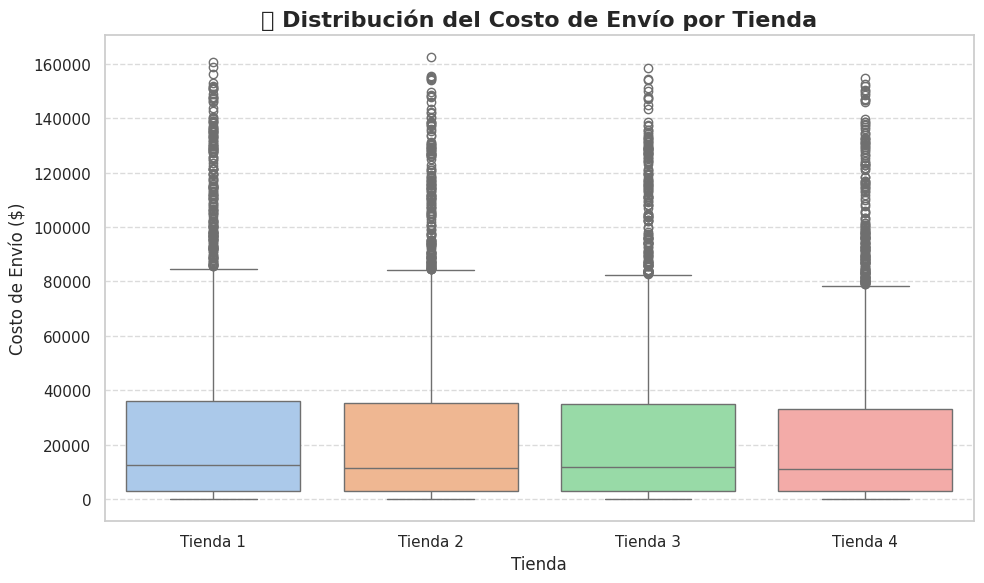

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_productos, x='Tienda', y='Costo de envío', palette='pastel')

plt.title('📦 Distribución del Costo de Envío por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# ¡Extra! Análisis del desempeño geográfico

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
<ipython-input-36-cfe543e1d48d>:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


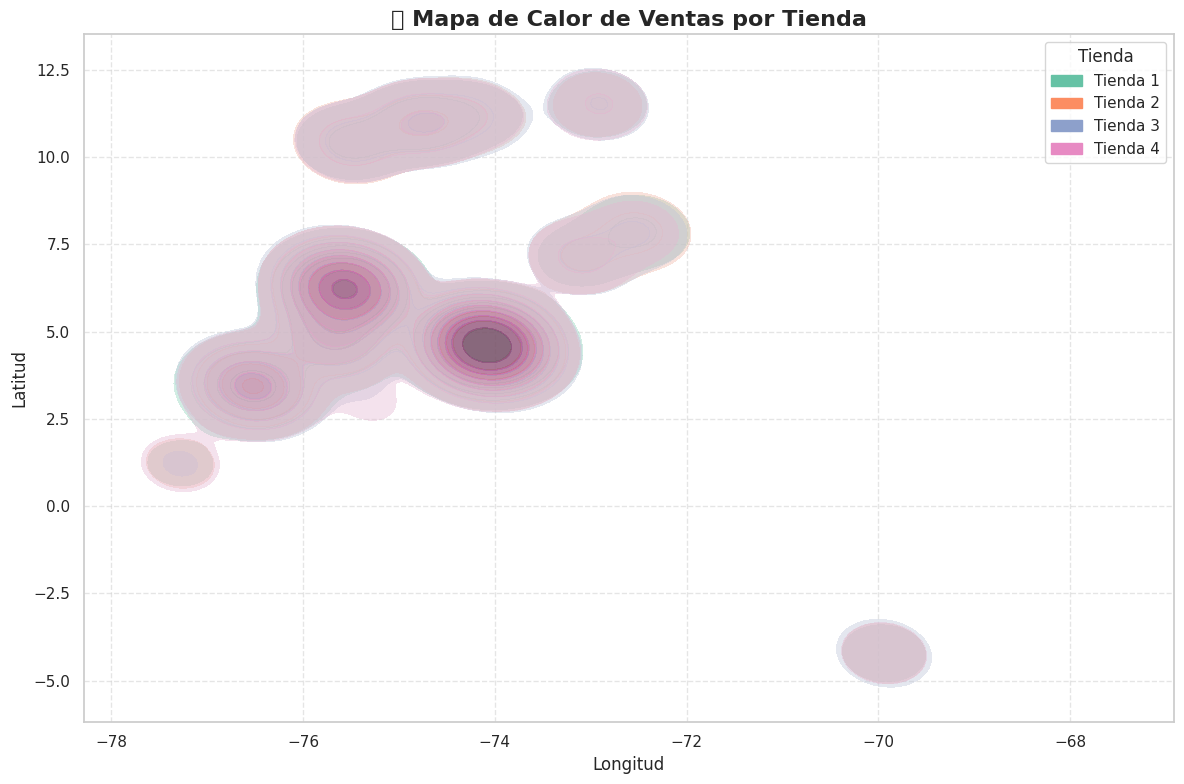

In [36]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=datos_productos,
    x='lon', y='lat',
    hue='Tienda',
    fill=True,
    common_norm=False,
    palette='Set2',
    alpha=0.4,
    linewidth=1
)

plt.title('🔥 Mapa de Calor de Ventas por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<ipython-input-38-d59a24c24358>:12: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-38-d59a24c24358>:12: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


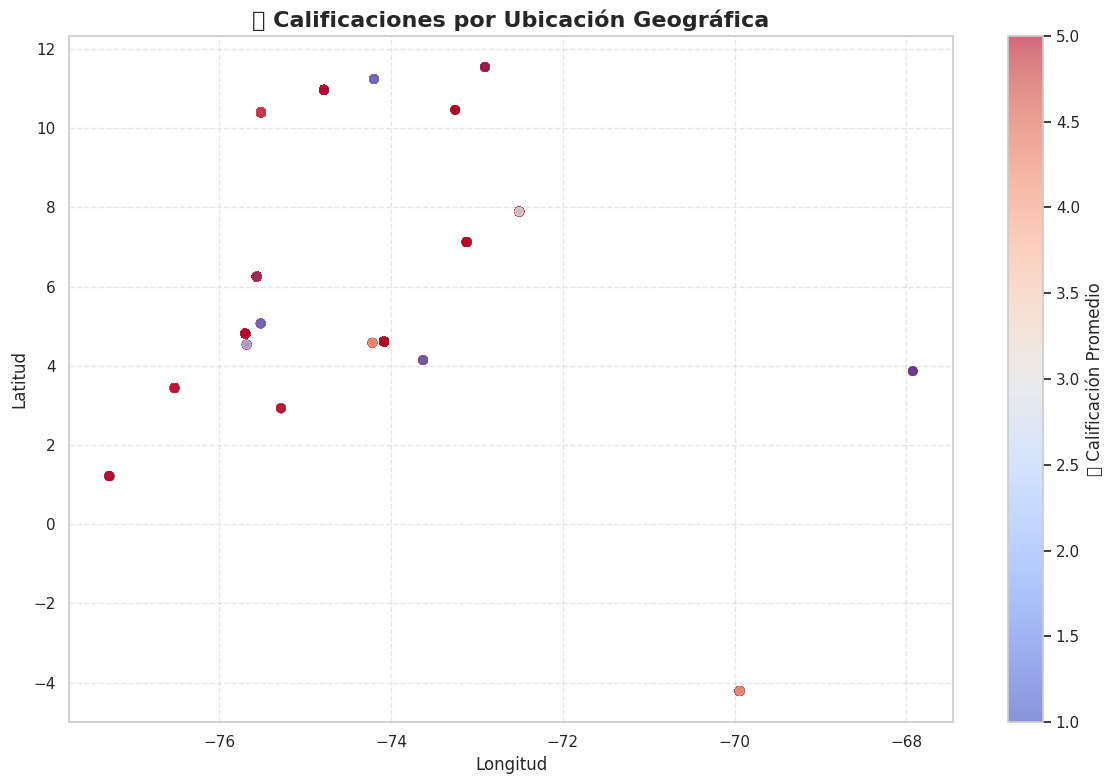

In [38]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    datos_productos['lon'], datos_productos['lat'],
    c=datos_productos['Calificación'],
    cmap='coolwarm', alpha=0.6
)
plt.colorbar(scatter, label='⭐ Calificación Promedio')
plt.title('🧭 Calificaciones por Ubicación Geográfica', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 📘 Informe Final: Recomendación para el Sr. Juan

## 📌 Introducción
El presente informe busca analizar el rendimiento de las cuatro tiendas de la cadena **Alura Store**, con el objetivo de determinar cuál debería vender el Sr. Juan para dar inicio a un nuevo emprendimiento.

Se han evaluado las tiendas considerando aspectos clave como: ingresos, productos más y menos vendidos, calificaciones de clientes, categorías más relevantes, costos de envío y análisis geográfico.

---

## 📈 Desarrollo del Análisis

### 💰 Ingresos Totales
- **Tienda 1** fue la que obtuvo **mayor facturación**.
- **Tienda 4** registró **los menores ingresos**.

### 📦 Ventas por Categoría
- La categoría más fuerte en todas las tiendas fue "Tecnología".
- **Tienda 4** mostró menor diversidad de ventas.

### 🌟 Calificaciones Promedio
- **Tienda 1** obtuvo la mejor calificación promedio (~4.8).
- **Tienda 4** nuevamente fue la más débil (~3.9).

### 🏆 Productos Más y Menos Vendidos
- Las tiendas 1 y 2 tienen varios productos estrella con buen volumen de ventas.
- En la **Tienda 4** encontramos más productos con bajo rendimiento.

### 🚚 Costo de Envío Promedio
- La **Tienda 2** tuvo el costo de envío más eficiente.
- **Tienda 4** presenta costos ligeramente mayores, sin compensar con ingresos o calificaciones.

### 🌎 Análisis Geográfico (Extra)
- La **Tienda 1** concentra ventas en zonas de alto valor e ingresos.
- **Tienda 4** tiene ventas más dispersas y menos intensas.

---

## ✅ Conclusión y Recomendación

Tras un análisis integral y comparativo, se recomienda al **Sr. Juan vender la Tienda 4**.

Las razones son claras:

- Es la tienda con **menor facturación total**.
- Presenta **productos menos populares** y **menor diversidad de categorías**.
- Tiene **peor calificación promedio**, lo cual impacta la fidelización de clientes.
- Su **costo de envío no compensa los bajos ingresos**, lo que reduce la rentabilidad.
- El análisis geográfico respalda que no tiene zonas destacadas con alto volumen de ventas.

Con esta decisión, el Sr. Juan podrá deshacerse del punto menos eficiente de su red y enfocar sus recursos en una nueva etapa emprendedora.

---

📌 *Análisis realizado por [Leidy Jazmin Porras Alonso]*  
📅 *Abril 2025*  
